In [1]:
include("../src/Atoms.jl")
include("../src/scfOptions.jl")
include("../src/kerker_mix.jl")
include("../src/Ham.jl")
include("../src/hartree_pot_bc.jl")
include("../src/pseudocharge.jl")
include("../src/getocc.jl")
include("../src/anderson_mix.jl")

anderson_mix (generic function with 1 method)

In [2]:
#set up similar to insulator example
dx = 1.0;
Nunit = 32;
Lat = 10;
# using the default values in Lin's code
betamix = 0.5
YukawaK = 0.0100
n_extra = 10;
epsil0 = 10.0;
T_elec = 100.0;

kb = 3.1668e-6;
au2K = 315774.67;
Tbeta = au2K / T_elec;

Ndist  = 1;   # Temporary variable
Natoms = round(Integer, Nunit / Ndist); # number of atoms

R = zeros(Natoms, 1); # this is defined as an 2D array
for j = 1:Natoms
  R[j] = (j-0.5)*Lat*Ndist+dx;
end

R[16] = R[16]+0.3;

sigma  = ones(Natoms,1)*(6.0);  # Metal
omega  = ones(Natoms,1)*0.03;
Eqdist = ones(Natoms,1)*10.0;
mass   = ones(Natoms,1)*42000.0;
nocc   = ones(Natoms,1)*2;          # number of electrons per atom
Z      = nocc;

# creating an atom structure
atoms = Atoms(Natoms, R, sigma,  omega,  Eqdist, mass, Z, nocc);

# allocating a Hamiltonian
ham = Ham(Lat, Nunit, n_extra, dx, atoms,YukawaK, epsil0, Tbeta)

# total number of occupied orbitals
Nocc = round(Integer, sum(atoms.nocc) / ham.nspin);

# initialize the potentials within the Hemiltonian, setting H[\rho_0]
init_pot!(ham, Nocc)

# initializing the options
KerkerB = 0.5;
mixOpts = kerkerMixOptions(betamix, KerkerB, 2*ham.kmul, YukawaK, epsil0)

eigOpts = eigOptions();

scfOpts = scfOptions(eigOpts,mixOpts )

scfOptions(1.0e-7, 100, eigOptions(1.0e-8, 100, "eigs"), kerkerMixOptions(0.5, 0.5, [0.0; 0.000385531; … ; 0.00154213; 0.000385531], 0.01, 10.0))

In [3]:
# running the scf iteration
@time VtoterrHist = scf!(ham, scfOpts)

  6.762926 seconds (11.17 M allocations: 1.087 GiB, 4.98% gc time)


32-element Array{Float64,1}:
 Inf                    
 104.36453822746607     
  34.62621473572992     
  14.795845777029612    
   6.905354996342019    
   3.353526782321226    
   1.6620811993133102   
   0.8331744547122403   
   0.4205109941160691   
   0.21315487104352063  
   0.10835508444864438  
   0.05518600051647729  
   0.028141788515959738 
   ⋮                    
   0.0001295259477279209
   6.600025792207647e-5 
   3.361079285306922e-5 
   1.7105991855957853e-5
   8.700676187128356e-6 
   4.422541731687512e-6 
   2.2466967697776076e-6
   1.1406514406537173e-6
   5.785689964347668e-7 
   2.934413580121404e-7 
   1.4872918678679095e-7
   7.530352387763399e-8 

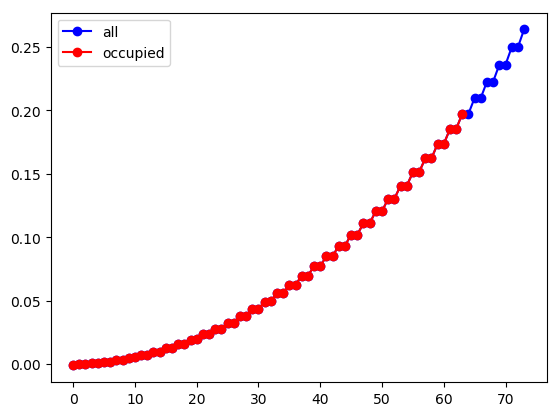

PyObject <matplotlib.legend.Legend object at 0x13e50e0f0>

In [4]:
using PyPlot
plot(ham.ev,"b-o",label="all")
plot(ham.ev[1:Nocc],"r-o",label="occupied")
legend()

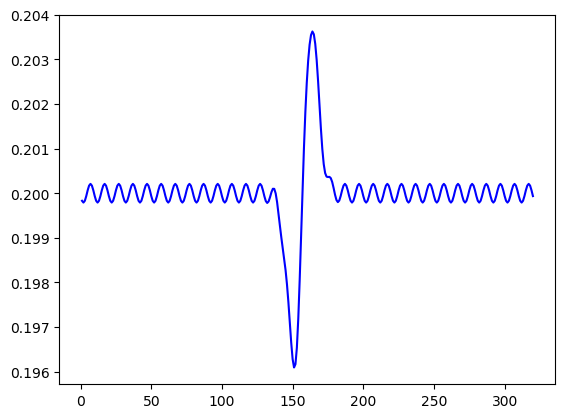

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x13e7e52b0>

In [5]:
plot(1:ham.Ns,ham.rho,"b-")

In [6]:
#set up similar to insulator example
dx = 1.0;
Nunit = 32;
Lat = 10;
# using the default values in Lin's code
betamix = 0.5
YukawaK = 0.0100
n_extra = 10;
epsil0 = 10.0;
T_elec = 100.0;

kb = 3.1668e-6;
au2K = 315774.67;
Tbeta = au2K / T_elec;

Ndist  = 1;   # Temporary variable
Natoms = round(Integer, Nunit / Ndist); # number of atoms

R = zeros(Natoms, 1); # this is defined as an 2D array
for j = 1:Natoms
  R[j] = (j-0.5)*Lat*Ndist+dx;
end

sigma  = ones(Natoms,1)*(6.0);  # Metal
omega  = ones(Natoms,1)*0.03;
Eqdist = ones(Natoms,1)*10.0;
mass   = ones(Natoms,1)*42000.0;
nocc   = ones(Natoms,1)*2;          # number of electrons per atom
Z      = nocc;

# creating an atom structure
atoms2 = Atoms(Natoms, R, sigma,  omega,  Eqdist, mass, Z, nocc);

# allocating a Hamiltonian
ham2 = Ham(Lat, Nunit, n_extra, dx, atoms2,YukawaK, epsil0, Tbeta)

# total number of occupied orbitals
Nocc = round(Integer, sum(atoms2.nocc) / ham2.nspin);

# initialize the potentials within the Hemiltonian, setting H[\rho_0]
init_pot!(ham2, Nocc)

# initializing the options
KerkerB = 0.5;
mixOpts = kerkerMixOptions(betamix, KerkerB, 2*ham2.kmul, YukawaK, epsil0)

eigOpts = eigOptions();

scfOpts = scfOptions(eigOpts,mixOpts )

scfOptions(1.0e-7, 100, eigOptions(1.0e-8, 100, "eigs"), kerkerMixOptions(0.5, 0.5, [0.0; 0.000385531; … ; 0.00154213; 0.000385531], 0.01, 10.0))

In [7]:
# running the scf iteration
@time VtoterrHist = scf!(ham2, scfOpts)

  3.143518 seconds (2.59 M allocations: 546.581 MiB, 4.59% gc time)


24-element Array{Float64,1}:
 Inf                     
   2.410674081624959     
   0.7653586648081715    
   0.3102115718877866    
   0.1361526678602423    
   0.06171352327100072   
   0.028369778568535852  
   0.013125080664649874  
   0.00609004327477048   
   0.002829615064612047  
   0.0013155496566110245 
   0.0006118064705406121 
   0.0002845638837151567 
   0.00013236503387572144
   6.157131951050259e-5  
   2.8641143805440916e-5 
   1.3323087854259418e-5 
   6.1975608617186625e-6 
   2.8829510500727985e-6 
   1.3410783251357675e-6 
   6.23825568136954e-7   
   2.902256080876567e-7  
   1.348517418513086e-7  
   6.28931476519368e-8   

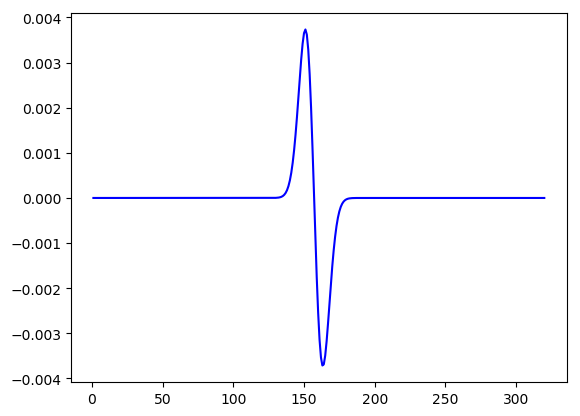

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1233012b0>

In [8]:
plot(1:ham.Ns,ham2.rho-ham.rho,"b-")